In [6]:
%matplotlib inline

#Enable reloading because restarting the kernel is a pain
%load_ext autoreload
%autoreload 2

import shapely
from shapely.geometry import Polygon

import matplotlib.pyplot as plt
import numpy as np

from bot_2d_rep import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Set up the initial robot

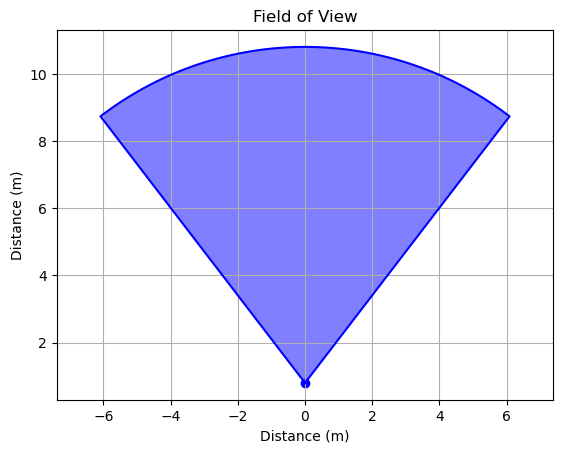

In [7]:
sensors = [FOV2D_Simple(hfov=75, distance=10, focal_point=(0,.8), color='blue'), #front
           FOV2D_Simple(hfov=75, distance=10, focal_point=(-.8,.3), color='blue').rotate(60),
           FOV2D_Simple(hfov=75, distance=10, focal_point=(-.8,-.3), color='blue').rotate(120),
           FOV2D_Simple(hfov=75, distance=10, focal_point=(.8,.3), color='blue').rotate(-60),
           FOV2D_Simple(hfov=75, distance=10, focal_point=(.8,-.3), color='blue').rotate(-120)]
sensors[0].plot_fov(whole_plot=True)


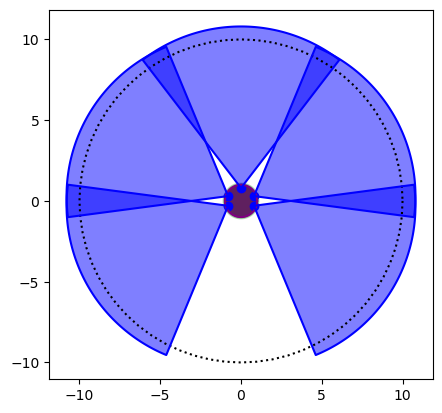

In [8]:
bot_bounds =  Polygon(shapely.geometry.Point(0, 0).buffer(1).exterior.coords)
sens_constraint = bot_bounds.buffer(0.1).difference(bot_bounds)
sense_requirement =  Polygon(shapely.geometry.Point(0, 0).buffer(10).exterior.coords)
bot = SimpleBot2d(bot_bounds, sense_requirement, sensor_pose_constraint=sens_constraint)
bot.add_sensors_2d(sensors)
bot.plot_bot(show_constraint=True)